In [21]:
%matplotlib inline
#Jupyter configuration
import matplotlib.pyplot as plt, pandas as pd
plt.rc('figure', figsize = (14,6))#size of figure to create

In [22]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

<img src="Box-Plot.png" width=70%>

<AxesSubplot:>

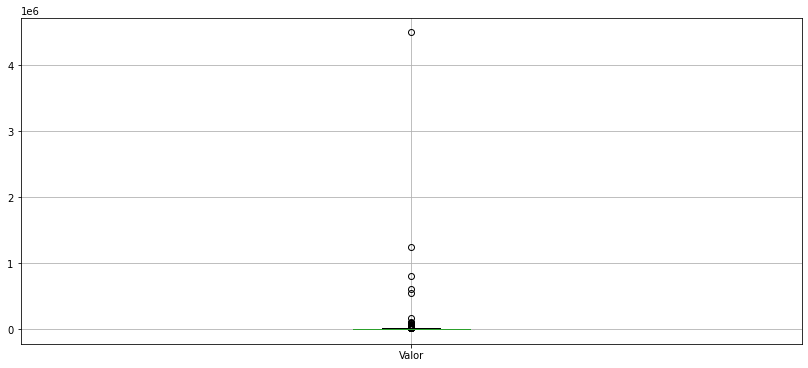

In [23]:
dados.boxplot(['Valor'])# Só conseguimos ver os dados discrepantes

In [24]:
#dados discrepantes
valor = dados.Valor
dados[dados['Valor'] >= 50000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
121,Apartamento,Ipanema,4,6,1,700,65000.0,8860.0,5699.0,92.86,Apartamento
1220,Casa de Condomínio,Barra da Tijuca,5,8,5,1150,60000.0,2000.0,1700.0,52.17,Casa
2251,Apartamento,Ipanema,4,6,4,700,65000.0,8860.0,599.0,92.86,Apartamento
4059,Casa de Condomínio,Jardim Botânico,4,6,4,600,50000.0,0.0,0.0,83.33,Casa
4863,Apartamento,Ipanema,5,3,4,806,90000.0,9170.0,6000.0,111.66,Apartamento
4962,Apartamento,Ipanema,4,1,4,470,55000.0,7500.0,3200.0,117.02,Apartamento
5584,Apartamento,Leblon,4,2,2,650,51000.0,7000.0,0.0,78.46,Apartamento
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
7673,Apartamento,Leblon,4,2,2,791,50000.0,2600.0,1980.0,63.21,Apartamento
9392,Apartamento,Ipanema,4,2,2,467,55000.0,8000.0,0.0,117.77,Apartamento


In [25]:
#Montar os quartis
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1#Intervalo interquartil
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [26]:
#vamos só pegar quem está dentro desses limites
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]
dados_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


<AxesSubplot:>

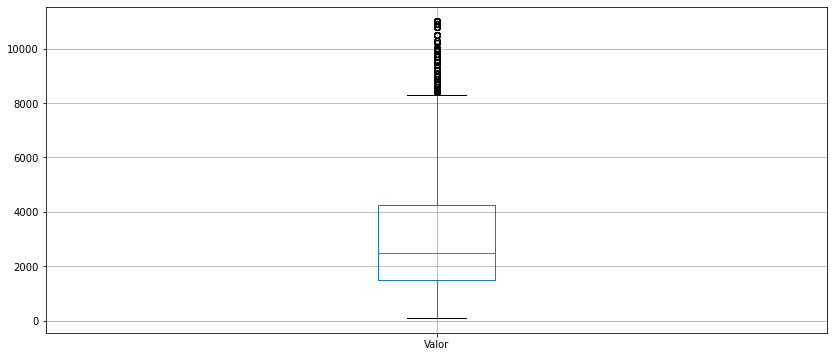

In [27]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

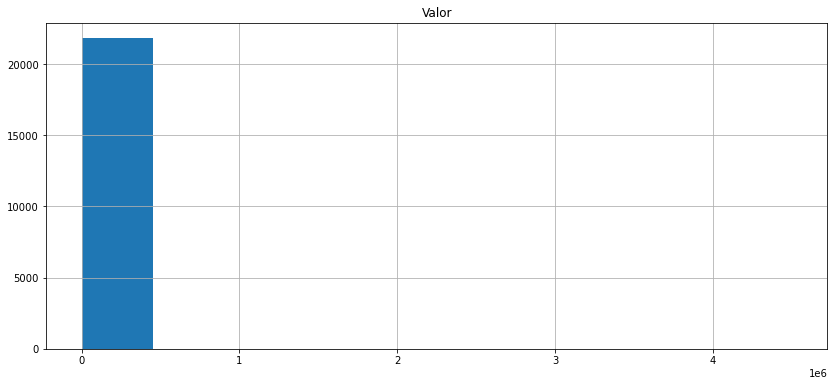

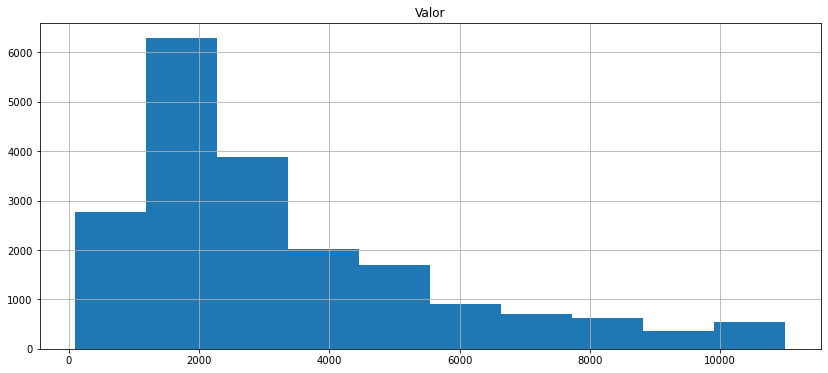

In [28]:
#distribuição de frequências, histograma
dados.hist(['Valor'])
dados_new.hist(['Valor'])

#  Identificando e Removendo Outliers por Grupo

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

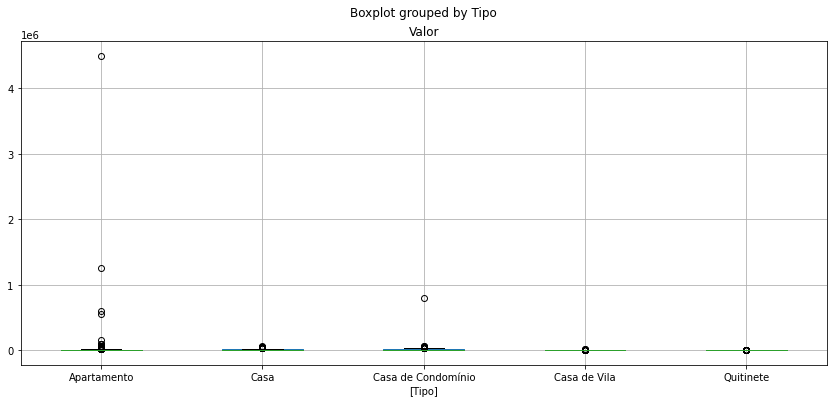

In [29]:
# Há outliers que estão num tipo de imóvel, mas não está num outro. Isso afeta a distribuição. Vamos ver
dados.boxplot(['Valor'], by = ['Tipo'])
# Mas os dados podem ser de categorias diferentes, e.g, imóveis de alto padrão, kitnets, etc e não discrepantes

In [31]:
 #Vamos fazer agrupamentos pra trabalhar com isso
grupo_tipo = dados.groupby('Tipo')
type(grupo_tipo)

pandas.core.groupby.generic.DataFrameGroupBy

In [32]:
# Mas criamos para todo DataFrame, vamos separar para somente o Valor
grupo_tipo = dados.groupby('Tipo')['Valor']

In [33]:
 grupo_tipo.groups

{'Apartamento': [2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, ...], 'Casa': [1, 22, 54, 57, 96, 100, 144, 160, 180, 238, 250, 253, 264, 286, 310, 316, 334, 339, 357, 378, 385, 399, 424, 434, 474, 475, 481, 511, 542, 543, 567, 571, 572, 618, 621, 630, 635, 636, 660, 676, 700, 721, 724, 760, 771, 780, 856, 873, 937, 982, 1029, 1036, 1118, 1123, 1125, 1157, 1178, 1249, 1256, 1316, 1335, 1350, 1371, 1412, 1426, 1430, 1440, 1445, 1472, 1475, 1488, 1586, 1604, 1656, 1662, 1666, 1671, 1684, 1709, 1717, 1762, 1810, 1835, 1875, 1905, 1933, 1942, 1960, 2019, 2039, 2056, 2075, 2101, 2107, 2108, 2133, 2170, 2201, 2204, 2211, ...], 'Casa 

In [49]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1#Intervalo interquartil
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [43]:
grupo_tipo.quantile(.25)

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [47]:
# Para criar um boxplot para cada tipo de imóvel, devemos separá-los. Lembre-se que no agrupamento, os grupos são as chaves de dicionário
for tipo  in grupo_tipo.groups.keys():
    print(tipo)

Apartamento
Casa
Casa de Condomínio
Casa de Vila
Quitinete


In [55]:
dados_new = pd.DataFrame()
for tipo  in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo #seleção dos elementos que contenham somente o tipo no looping
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    #criar um DataFrame com essa seleção
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

In [56]:
dados_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21687,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0,40.00,Apartamento
21728,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0,39.13,Apartamento
21748,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0,45.83,Apartamento
21815,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento


<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

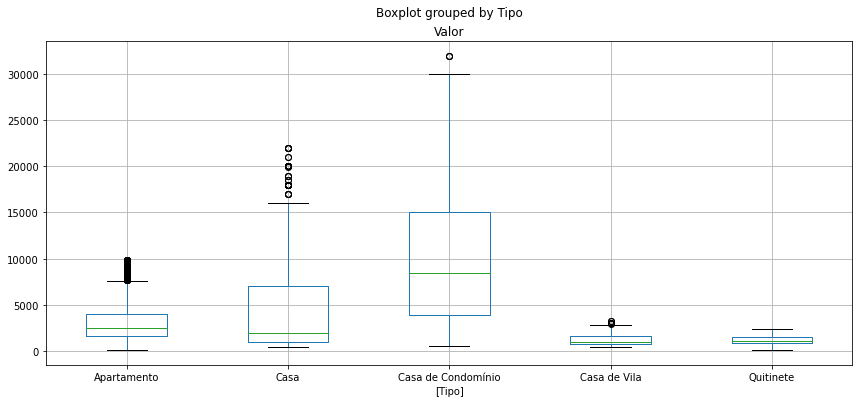

In [57]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [58]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)

Text(0.5, 1.0, 'Valor Médio por Tipo')

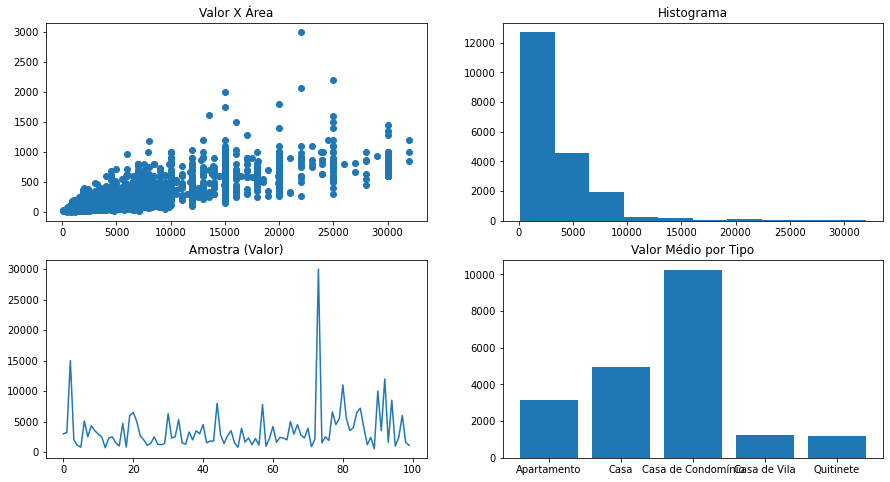

In [69]:
%matplotlib inline
plt.rc('figure', figsize = (15,8))#size of figure to create
# Lets create four plots in one figure
# Create the figure
area = plt.figure()
# Create the plots
g1 = area.add_subplot(2, 2, 1) #plot 1, (2 lines, 2 columns, first position)
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)
# Put data on plots
g1.scatter(dados_new.Valor, dados_new.Area)
g1.set_title('Valor X Área')

g2.hist(dados_new.Valor)
g2.set_title('Histograma')

dados_new_g3 = dados_new.Valor.sample(100) #Seleciona aleatoriamente uma amostra de 100 itens, mas não reseta os índices, logo, isso deve ser corrigido
dados_new_g3.index = range(dados_new_g3.shape[0])
g3.plot(dados_new_g3)
g3.set_title('Amostra (Valor)')

grupo = dados_new.groupby('Tipo')['Valor']
label = grupo.mean().index
valores = grupo.mean().values
g4.bar(label, valores)
g4.set_title('Valor Médio por Tipo')

In [70]:
area.savefig('graph.png', dpi = 300, bbox_inches = 'tight')
g3.pie()